<a href="https://colab.research.google.com/github/brunobf09/COVID-19-Manaus/blob/main/%5BARTIGO%5D_COVID_Manaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segunda onda? Lockdown? O que a análise de dados tem a dizer de Manaus-AM
###Análise da Conjuntura do COVID-19 na cidade de Manaus
---
by: **Bruno Brasil**

<center><img width="800" src="https://image.freepik.com/vetores-gratis/covid-19-projeto-de-surto-de-coronavirus-com-celula-de-virus-em-vista-microscopica-sobre-fundo-azul-modelo-de-ilustracao-no-tema-epidemico-de-sars-perigoso-para-banner-ou-panfleto-promocional_1314-2644.jpg">

A COVID-19 é uma doença infecciosa causadora de doenças respiratórias leves a moderadas, semelhantes a um resfriado comum. No entanto, por vezes pode causar quadros clínicos graves, como a síndrome respiratória aguda grave (SRAG).

Segundo a OMS, até 01 de Outubro de 2020, foram confirmados no mundo 33.842.281 casos confirmados de COVID-19 e 1.010.634 mortes. Até essa data, o Ministério da Saúde do Brasil confirmou no país, 4.847.092 casos e 114.680
óbitos acumulados, com letalidade de 3,0%. 

No dia 29 de Setembro, a Fundação Oswaldo Cruz (Fiocruz) emitiu uma nota técnica afirmando que o aumento nos números da Covid-19 em Manaus apresenta "níveis atuais acima do esperado", indicando que Manaus vive uma segunda onda da doença e sugeriu lockdown (bloqueio total de circulação de pessoas) para conter avanço.

Diante do fato, o presente artigo tem por objetivo, levantar dados do Governo do Amazonas e realizar uma análise exploratória da conjuntura do COVID-19 na cidade de Manaus.

#Análise dos números de novos casos e óbitos.

De acordo com o [boletim diário do estado do Amazonas](http://www.fvs.am.gov.br/media/publicacao/01_10_20_BOLETIM_DI%C3%81RIO_DE_CASOS_COVID-19.pdf), do dia 01 de Outubro de 2020, Manaus apresentou 52.039 casos confirmados e 2.631 óbitos acumulados, com letalidade de 5,06%.

Em primeiro momento, será analisado se realmente houve um aumento no número de novos casos e óbitos. Para fazer essa análise, foram importados dados do Ministério da Saúde no site https://covid.saude.gov.br/.

Os dados do governo são divididos por semanas epidemiológicas, iniciando no dia 27-03-20 representado pela semana 13 até o dia 26-09-20, representado pela semana 39. a semana 40 não foi incluída porque medidas de prevenção foram tomadas pelo governo e o objetivo desse artigo é apresentar a conjuntura da cidade antes dessas medidas.

In [1]:
#Importando dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Carregando dados
df = pd.read_csv("/content/HIST_PAINEL_COVIDBR_02out2020.csv", sep=";")

#Filtrando dados para o município de Manaus
manaus = df.loc[df["municipio"] == "Manaus"]

#Somando linhas de acordo com a semana epidemiológica e reorganizando dados
covid_manaus = manaus.set_index("semanaEpi").sum(level=0).reset_index()

#Excluindo a semana epidemiológica 40
covid_manaus.drop(axis=0,index=27, inplace=True)



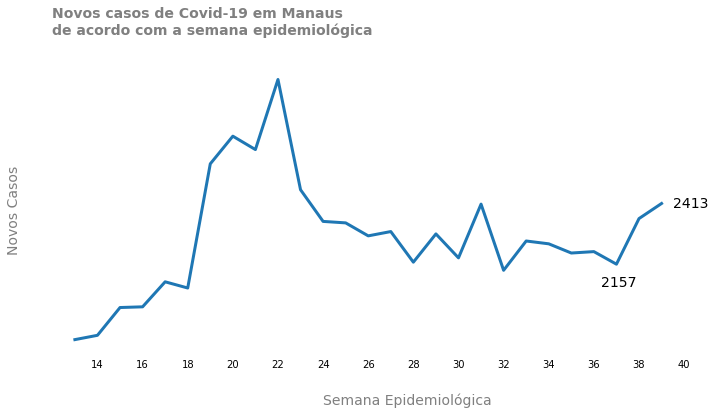

In [11]:
#Criando o plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot("semanaEpi","casosNovos", data = covid_manaus, linewidth=3)

#Removendo bordas
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# ajustando a frequência no eixo x
plt.xticks(np.arange(14,42, 2.0))

#Remoção do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#Removendo ticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,
    top=False,         
    labelbottom=True) 

# Inserindo texto
plt.text(12, 5000, 
         'Novos casos de Covid-19 em Manaus \n'
         'de acordo com a semana epidemiológica\n',
         fontsize=14, 
         color="gray",
         weight='bold')

plt.text(24, -1000, 
          'Semana Epidemiológica',
         fontsize=14, 
         color="gray")

plt.text(10,1600, 
          'Novos Casos',
         fontsize=14, 
         color="gray",
         rotation=90,)

plt.text(39.5,2350, 
          covid_manaus["casosNovos"][26],
           fontsize=14, 
          color="black")

plt.text(36.3,1000, 
         covid_manaus["casosNovos"][25],
        fontsize=14, 
        color="black")

#Finalizando o processo de plot
fig.tight_layout()
plt.show()

De acordo com a análise dos dados, Manaus passou por duas semanas de aumento em relação aos novos casos, atingindo aproximadamente 12% de aumento em relação a semana 37. Analisar o número de novos casos não nos traz muita informação, pois está atrelada a quantidade de testes realizados e, é sabido que os teste rápidos são imprecisos, o que torna a análise do número de testes inviável para esse estudo.

Uma análise com maior valor é a de número de óbitos. Sendo assim, será analisado se o aumento do número de casos influenciou no número de óbitos e qual é a tendência do número de óbitos.

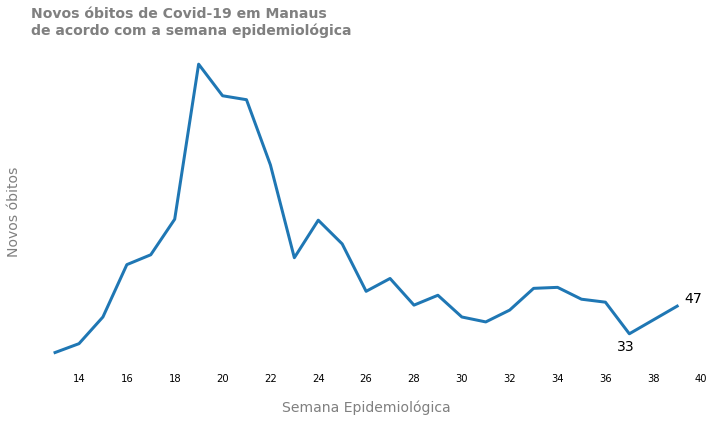

In [10]:
#Criando o plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot("semanaEpi","obitosNovos", data = covid_manaus, linewidth=3)
# ax.plot("semanaEpi","obitosNovos", data = new_am, linewidth=3,color='green')

#Removendo bordas
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#Ajustando frequência no eixo x
plt.xticks(np.arange(14,42, 2.0))


#Remoção do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# Removendo xticks do eixo x 
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

# Adicionando texto
plt.text(12, 350, 
         'Novos óbitos de Covid-19 em Manaus \n'
         'de acordo com a semana epidemiológica\n',
         fontsize=14,
         verticalalignment="top", 
         color="gray",
         weight='bold')

plt.text(22.5,-60, 
          'Semana Epidemiológica',
         fontsize=14, 
         color="gray")

plt.text(11,100, 
          'Novos óbitos',
         fontsize=14, 
         color="gray",
         rotation=90,)

plt.text(39.3,50, 
          covid_manaus["obitosNovos"][26],
         fontsize=14, 
         color="black")

plt.text(36.5,2, 
          covid_manaus["obitosNovos"][25],
         fontsize=14, 
         color="black")


#Finalizando processo de plot
fig.tight_layout()
plt.show()


Quando comparado os dados de óbitos, é perceptível o aumento elevado na semana 36, o que faz refletir num possível erro de lançamento, tendo em vista que não houve variação brusca no gráfico de novos casos nessa mesma semana epidemiológica. Verificando os dados percebesse que foram lançados 127 óbitos no dia 2 de setembro, o que foge bastante da média móvel relativa ao período, conforme [link](((https://susanalitico.saude.gov.br/extensions/covid-19_html/covid-19_html.html))). Não é possível precisar o valor correto, então para manter a análise, o valor de 127 será substituído pela média móvel do período, 14 óbitos.

In [4]:
#correção do gráfico

#verificando erro
manaus.loc[df["semanaEpi"] == 36]

#alteração do dado
#número 14 foi escolhido de acordo a média móvel no site do ministério da saúde
manaus["obitosNovos"][27627] = 14

#reorganizando dados
covid_manaus = manaus.set_index("semanaEpi").sum(level=0).reset_index()
covid_manaus.drop(axis=0,index=27, inplace=True)







/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


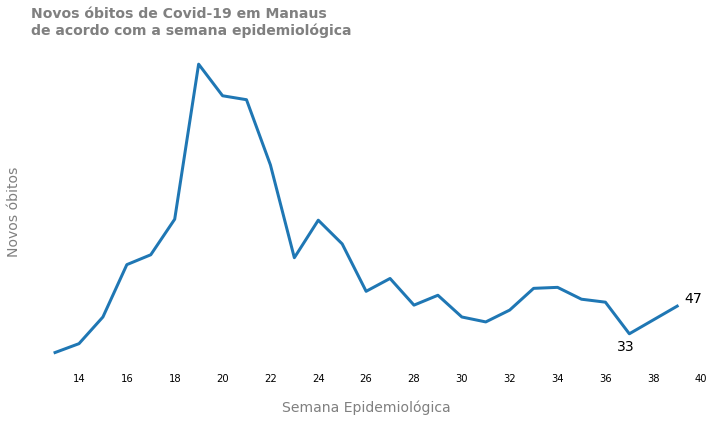

In [5]:
#Criando o plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot("semanaEpi","obitosNovos", data = covid_manaus, linewidth=3)
# ax.plot("semanaEpi","obitosNovos", data = new_am, linewidth=3,color='green')

#Removendo bordas
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#Ajustando frequência no eixo x
plt.xticks(np.arange(14,42, 2.0))


#Remoção do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#Removendo ticks do eixo x 
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

#Adicionando texto
plt.text(12, 350, 
         'Novos óbitos de Covid-19 em Manaus \n'
         'de acordo com a semana epidemiológica\n',
         fontsize=14,
         verticalalignment="top", 
         color="gray",
         weight='bold')

plt.text(22.5,-60, 
          'Semana Epidemiológica',
         fontsize=14, 
         color="gray")

plt.text(11,100, 
          'Novos óbitos',
         fontsize=14, 
         color="gray",
         rotation=90,)

plt.text(39.3,50, 
          covid_manaus["obitosNovos"][26],
         fontsize=14, 
         color="black")

plt.text(36.5,2, 
          covid_manaus["obitosNovos"][25],
         fontsize=14, 
         color="black")


#Finalizando processo de  plot
fig.tight_layout()
plt.show()

Comparado o mesmo período de aumento do número de novos casos, podemos verificar que também houve um aumento de 33 para 47 no número de óbitos.

Porém ao observar a semana 31 a 33, pode-se verificar também, durante o mesmo período de duas semanas, o aumento do número de óbitos e, logo em seguida, uma diminuição do número. 

Diante da visualização dos dados, aparentemente o gráfico ainda estaria numa tendência de baixa podendo estacionar num platô ou modificar para uma tendência de alta, porém só seria possível confirma a tendência após a análise de mais semanas.

Vale ressaltar, que além do lançamento do dado de 127 óbitos num único dia, é possível que existam erros nos lançamentos de óbitos e novos casos no período epidemiológico, tornando esses dados não tão bem distribuídos, o que dificulta a sua correta interpretação.

#Impactos do aumento do número de casos.

Tão importante quanto analisar o número de novos casos e óbitos, é analisar o número de hospitalizações e a taxa de ocupação de leitos e UTIs.

Para analisar esses dados, foram utilizados dados publicados no [boletim diário do Estado do Amazonas](http://www.fvs.am.gov.br/transparenciacovid19_dadosepidemiologicos). Para facilitar a visualização de dados e indentificar padrões comparados aos gráficos já apresentados, será utilizado o mesmo período de tempo que os gráficos anteriores.

In [6]:

# Os dados foram de hospitalização foram compilados dos boletins para uma planilha excel para facilitar a manipulação
# importando dados
df2 = pd.read_excel('/content/SRAG.xlsx')

#Criação de temporalidade
data = pd.date_range(start ='2020-03-13', 
                     end ='2020-09-24',  
                     freq = '7D')   

#Reajustando formato
semana_epi = data.strftime('%d/%m/%Y')

#Criando dados para quantidade de hospitaliações
qt_hospitalizacoes = []

for i in range(len(semana_epi)):
  soma = sum(df2['casoshospitalizados'][i*7:(i+1)*7])
  qt_hospitalizacoes.append(soma)

#Criando dataframe
hospitalizacoes = pd.DataFrame(data=semana_epi,columns=['Data'])
hospitalizacoes['casoshospitalizados'] = qt_hospitalizacoes





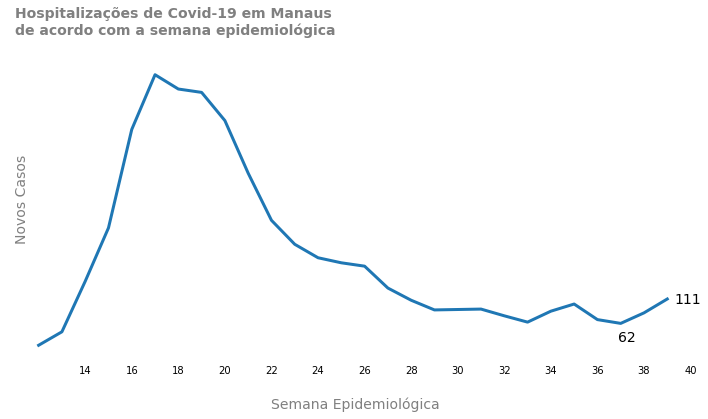

In [7]:
#Criando o plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(12,40),"casoshospitalizados", data = hospitalizacoes, linewidth=3)


#Remoção das bordas
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#Reajustando eixo x
plt.xticks(np.arange(14,42, 2.0))

# Removendo ticks do eixo x 
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 


#Remoção do eixo y
plt.gca().axes.get_yaxis().set_visible(False)




# Inserindo texto
plt.text(11, 700, 
         'Hospitalizações de Covid-19 em Manaus \n'
         'de acordo com a semana epidemiológica\n',
         fontsize=14, 
         color="gray",
         weight='bold')

plt.text(22, -150, 
          'Semana Epidemiológica',
         fontsize=14, 
         color="gray")

plt.text(11,250, 
          'Novos Casos',
         fontsize=14, 
         color="gray",
         rotation=90)
         

plt.text(39.3,100, 
          hospitalizacoes["casoshospitalizados"][27],
         fontsize=14, 
         color="black")

plt.text(36.9,10, 
          hospitalizacoes["casoshospitalizados"][24],
         fontsize=14, 
         color="black")

#finalizando processo de plot
fig.tight_layout()
plt.show()

É possível verificar que houve um aumento de 62 para 111 hospitalizações e que aparentemente se inicia um platô. O gráfico de hospitalizações, por si só, não consegue transmitir muitas informações, pois não é possível saber quanto tempo uma pessoa fica hospitalizada e qual impacto que ela causa no sistema de saúde.

Para tentar identificar o impacto das hospitalizações, será analisado a evolução do número de internações em leitos clínicos e UTIs no mês de setembro, levando em consideração a soma de leitos ocupados por pacientes confirmados com COVID-19 e os com suspeitas, tanto em leitos clínicos como em UTIs.

In [17]:
#Instalando biblioteca
!pip install pdfplumber -q

#importando bibliotecas
import pdfplumber
import os
from google.colab import drive

#todos os pdfs foram anexados no drive pessoal (boletins no site do Governo do Amazonas)
#selecionando diretório
drive.mount('/content/gdrive')

#selecionando pasta
os.chdir('/content/gdrive/My Drive/Sigmoidal/relatorios/covid')

#Criando variável com os itens da pasta
arquivos_da_semana = sorted(os.listdir())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
#@title
# O que tornou difícil na extração dos dados pdf é que os relatórios não são padronizados.
# No período de um mês varios relatórios foram modificados, por isso o código ficou longo.
# O conceito do primeiro "if" é o mesmo para os demais.

internacao = []

for arquivo in arquivos_da_semana:
  if int(arquivo.split("_")[0]) >17:
    relatório = pdfplumber.open(arquivo)
    página = relatório.pages[0] 
    texto = página.extract_text()
    total = texto.splitlines()[8].split(" ")[12]
    Total = int(total)
    internacao.append(Total)

  elif int(arquivo.split("_")[0]) == 16 or int(arquivo.split("_")[0]) == 17:
    relatório = pdfplumber.open(arquivo)
    página = relatório.pages[0] 
    texto = página.extract_text()
    total = texto.splitlines()[14].split(" ")[16]
    Total = int(total)
    internacao.append(Total)

  elif int(arquivo.split("_")[0]) >= 13 and int(arquivo.split("_")[0]) <16 :
    relatório = pdfplumber.open(arquivo)
    página = relatório.pages[0] 
    texto = página.extract_text()
    total = int(texto.splitlines()[12].split(" ")[10]) + int(texto.splitlines()[17].split(" ")[10])  
    Total = int(total) 
    internacao.append(Total)

  elif int(arquivo.split("_")[0]) > 4 and int(arquivo.split("_")[0]) <13:
    relatório = pdfplumber.open(arquivo)
    página = relatório.pages[0] 
    texto = página.extract_text()
    total = int(texto.splitlines()[8].split(" ")[5]) + int(texto.splitlines()[14].split(" ")[10])  
    Total = int(total) 
    internacao.append(Total)

  else:
    relatório = pdfplumber.open(arquivo)
    página = relatório.pages[0] 
    texto = página.extract_text()
    total = int(texto.splitlines()[7].split(" ")[5]) + int(texto.splitlines()[13].split(" ")[10])
    Total = int(total) 
    internacao.append(Total)

In [19]:
#Criando Dataframe com os campos Data e internação

#Criando o campo data
data = pd.date_range(start ='2020-09-01', 

       end ='2020-09-24')   

#Formatação da data
data = data.strftime('%d/%m/%Y') 

#Criando Dataframe
internacao_df = pd.DataFrame(data = data,columns=['Data'])
internacao_df['Internação'] = internacao

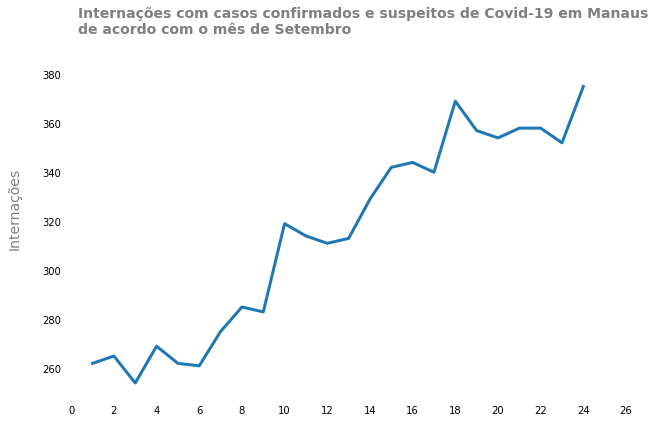

In [20]:
#Criando o plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,25),"Internação", data = internacao_df, linewidth=3)


#Remoção das bordas
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#Reajustando eixo x
plt.xticks(np.arange(0,27, 2))

# remover ticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,  
    left=False,  
    labelbottom=True) 

# Inserindo texto
plt.text(0.3, 390, 
         'Internações com casos confirmados e suspeitos de Covid-19 em Manaus \n'
         'de acordo com o mês de Setembro\n',
         fontsize=14, 
         color="gray",
         weight='bold')

plt.text(-3,310, 
          'Internações',
         fontsize=14, 
         color="gray",
         rotation=90)
         


# Finalizando processo de plot
plt.show()

De acordo com os dados, não só, existem mais casos de hospitalização, como também, houve o aumento no número de pessoas internadas. Ou seja, as pessoas não estão ficando internadas por curtos períodos de tempo e vagando os leitos, isso causa um aumento na taxa de ocupação, o que poderia acarretar no colapso do sistema de saúde.

A análise, agora, é entender o impacto do número de internados, e em qual sistema ele é mais crítico, no sistema público ou no sistema privado.

Para análise seráutilizado os mesmos boletins diários, porém, como já sabemos que houve um aumento do número de internados no mês de Setembro, será analisado o que havia no primeiro dia do mês e o que existe no dia 24 de Setembro, porque os dados após o dia 24 ficaram sujeitos a modificações devido ao decreto do Governo do Amazonas no dia 25, que impõem medidas para conter o aumento do número de novos casos confirmados.



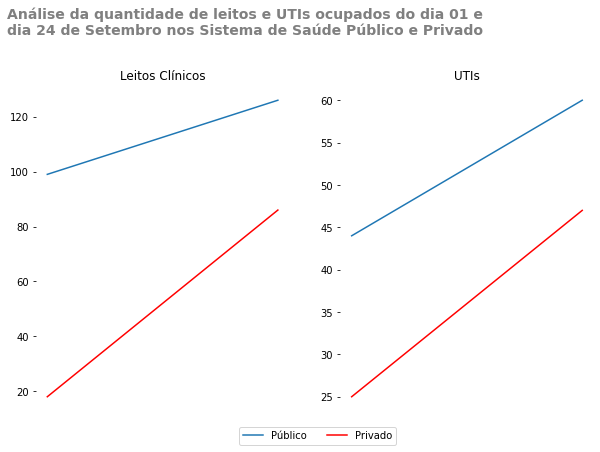

In [21]:
#@title
# Dados relacionandos aos boletins do dia 01/09 e 24/09
data = (1,24)
leitos_pub = (99,126)
leitos_priv = (18,86)
uti_pub = (44,60)
uti_priv = (25,47)

# Criando Fig para dois graficos
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

# Plotando vizualização
ax1.plot(data ,leitos_pub)
ax1.plot(data ,leitos_priv,color='red')
ax2.plot(data ,uti_pub)
ax2.plot(data ,uti_priv,color='red')

# Remoção de bordas e eixo x
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

# Legenda
ax1.legend(('Público','Privado'),loc='upper left',ncol=2,borderaxespad=-5, bbox_to_anchor=(1,-0.2))

# Título
ax1.set_title('Leitos Clínicos')
ax2.set_title('UTIs')

# Inserindo texto
ax1.text(-3,150, 
          "Análise da quantidade de leitos e UTIs ocupados do dia 01 e \n" 
          "dia 24 de Setembro nos Sistema de Saúde Público e Privado",
         fontsize=14, 
         color="gray",
         weight='bold')
         

# Finalizando processo
plt.show()

Nesse primeiro gráfico verifica-se que houve aumento de internações com casos confirmados por COVID-19 em todos os cenários, com destaque ao aumento significativo dos leitos clínicos e UTIs do sistema privado.

A análise agora será o quanto esses aumentos impactaram na taxa de ocupação.

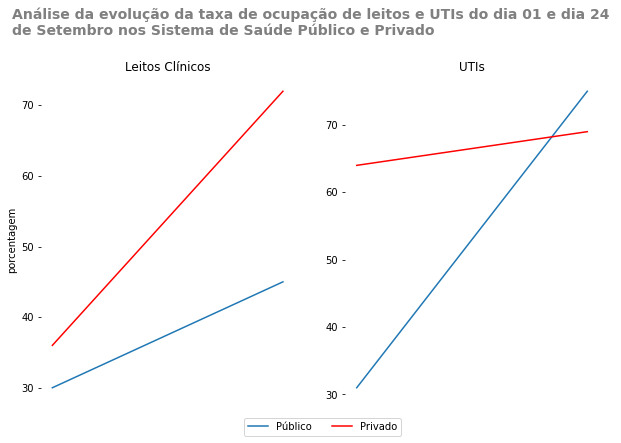

In [22]:
# Dados relacionandos aos boletins do dia 01/09 e 24/09
data = (1,24)
taxa_leitos_pub = (30,45)
taxa_leitos_priv = (36,72)
taxa_uti_pub = (31,75)
taxa_uti_priv = (64,69)

# Criando Fig para dois graficos
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

# Plotando vizualização
ax1.plot(data ,taxa_leitos_pub)
ax1.plot(data ,taxa_leitos_priv,color='red')
ax2.plot(data ,taxa_uti_pub)
ax2.plot(data ,taxa_uti_priv,color='red')

# Remoção de bordas e eixo x
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

# Legenda
ax1.legend(('Público','Privado'),loc='upper left',ncol=2,borderaxespad=-5, bbox_to_anchor=(1,-0.2))

# Título
ax1.set_title('Leitos Clínicos')
ax2.set_title('UTIs')

# Legendando eixo y
ax1.set_ylabel("porcentagem")

# Inserindo texto
ax1.text(-3,80, 
          "Análise da evolução da taxa de ocupação de leitos e UTIs do dia 01 e dia 24 \n"
          "de Setembro nos Sistema de Saúde Público e Privado",
         fontsize=14, 
         color="gray",
         weight="bold")

# Finalizando processo
plt.show()

Pode-se afirmar então, que houve um aumento significativo na taxa de ocupação dos leitos clínicos e um aumento menor nas UTIs do sistema privado, ambos próximos dos 70% de ocupação e, um aumento maior ainda nas UTIs do sistema público, passando dos 70%. 

Fica claro que o aumento de internações aumentou a taxa de ocupação, porém existe mais um fator que influência diretamente na taxa de ocupação, que são a quantidade de leitos e UTIs totais.

De acordo com os gráficos houve aumento tanto nas UTIs quanto nos leitos, em ambos os sistemas. Consequentemente há um aumento na taxa de ocupação dos hospitais.

Porém existe uma variável que ainda falta ser analisada: A quantidade de leitos. Não só o aumento de casos influência no aumento da taxa, como a diminuição de leitos também.

Com os dados da porcentagem, podemos concluir os valores para leitos nos mesmos períodos e avaliar se houve modificação.

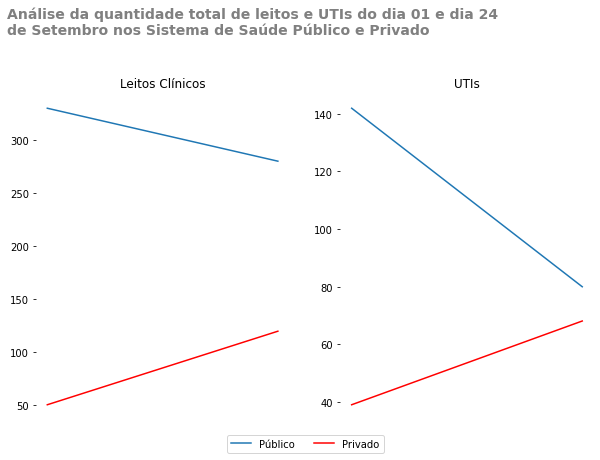

In [23]:
#@title
# Dados relacionandos a (quantidade de leitos ocupados)/(taxa de ocupação) identificando quantidade de leitos e UTIs total
data = (1,24)
leitos_pub_total = (99/0.3,126/0.45)
leitos_priv_total = (18/0.36,86/0.72)
uti_pub_total = (44/0.31,60/0.75)
uti_priv_total = (25/0.64,47/0.69)

# Criando Fig para dois graficos
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

# Plotando vizualização
ax1.plot(data ,leitos_pub_total)
ax1.plot(data ,leitos_priv_total,color='red')
ax2.plot(data ,uti_pub_total)
ax2.plot(data ,uti_priv_total,color='red')

# Remoção de bordas e eixo x
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

# Legenda
ax1.legend(('Público','Privado'),loc='upper left',ncol=2,borderaxespad=-5, bbox_to_anchor=(0.95,-0.2))

# Título
ax1.set_title('Leitos Clínicos')
ax2.set_title('UTIs')

# Inserindo texto
ax1.text(-3,400, 
          "Análise da quantidade total de leitos e UTIs do dia 01 e dia 24 \n"
          "de Setembro nos Sistema de Saúde Público e Privado",
         fontsize=14, 
         color="gray",
         weight="bold")

# Finalizando processo
plt.show()

Ficou claro que a diminuição de leitos clínicos e UTIs são fatores determinantes para avaliar o impacto do COVID-19 na taxa de ocupação.

Verifica-se que no sistema público houve aumento das internações, porém a taxa de ocupação foi muito afetada pela diminuição de leitos clínicos e principalmente as UTIs.

Já no sistema privado, o aumento de  leitos e UTIs não foram o suficiente para manter a taxa de ocupação, principalmente os leitos clínicos, que teve um aumento considerável.



#Conclusão

Após todas as análises é possível afirmar que houve um aumento no número de casos, acompanhado pelo aumento do número de óbitos nas duas últimas semanas epidemiológicas. Porém os valores apresentados ainda não constituem uma tendência de alta ao olhar dados passados. Foi notado que é possível que algumas falhas de lançamento tenham ocorrido, afetando principalmente a distribuição dos dados em relação às semanas epidemiológicas. Este erro impede uma melhor análise e uma perfeita definição de uma tendência de alta ou de baixa.

Foi possível avaliar também, o aumento de hospitalizações e internações acumuladas, o que se torna preocupante principalmente no sistema privado, onde houve um aumento significativo para 72,22% em ocupação de leitos clínicos e no setor público, que apesar de um aumento não tão significativo como o do sistema privado, teve uma diminuição agressiva na quantidade de UTIs, chegando a 74,70% da taxa de ocupação.

Como medidas já foram tomadas pelo governo, é importante acompanhar se haverá uma diminuição das taxas de ocupação, bem como o número de óbitos



#Pesquisas futuras e considerações finais

Ao realizar essas análises percebe-se que a guerra contra o COVID-19 é uma tarefa árdua e naturalmente existe a dificuldade com o armazenamento de dados e divulgação.

Outras pesquisas poderiam ser realizadas com o intuito de trazer mais informações relevantes, são elas:

1.   O por quê da variação de leitos e UTIs e qual seria a real capacidades dos hospitais para aumentar leitos e UTIs;

2.   Pesquisa relacionada a média de óbitos da cidade, quanto o COVID-19 influência nessa média e qual é a capacidade do Sistema Funerário;

3.   Qual era a taxa de ocupação dos hospitais antes do COVID-19 e qual Sistema de Saúde é mais eficiente na recuperação de novos casos.

As pesquisas relacionadas à saúde e ao COVID-19 são diversas, espero que tenham gostado e que esse artigo motive mais estudos na área da saúde. Deixo o link do Linkedin para demais interações ou dúvidas do assunto e, o Github para quem desejar visualizar os códigos utilizados na construção dos gráficos (códigos em Python).

Linkedin: https://www.linkedin.com/in/bruno-brasil-8a34101b6/

Github: https://github.com/brunobf09





#Referências

Ministério da saúde - https://covid.saude.gov.br/

Governo do Amazonas - http://coronavirus.amazonas.am.gov.br/